In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura`


In [2]:
include("../src/JMMenura.jl")

Main.JMMenura

In [3]:
using .JMMenura
using Phylo, Distributions, Random, Plots, LinearAlgebra, PosDefManifold
Random.seed!(1)

TaskLocalRNG()

## Simulation setup

### Tree setup

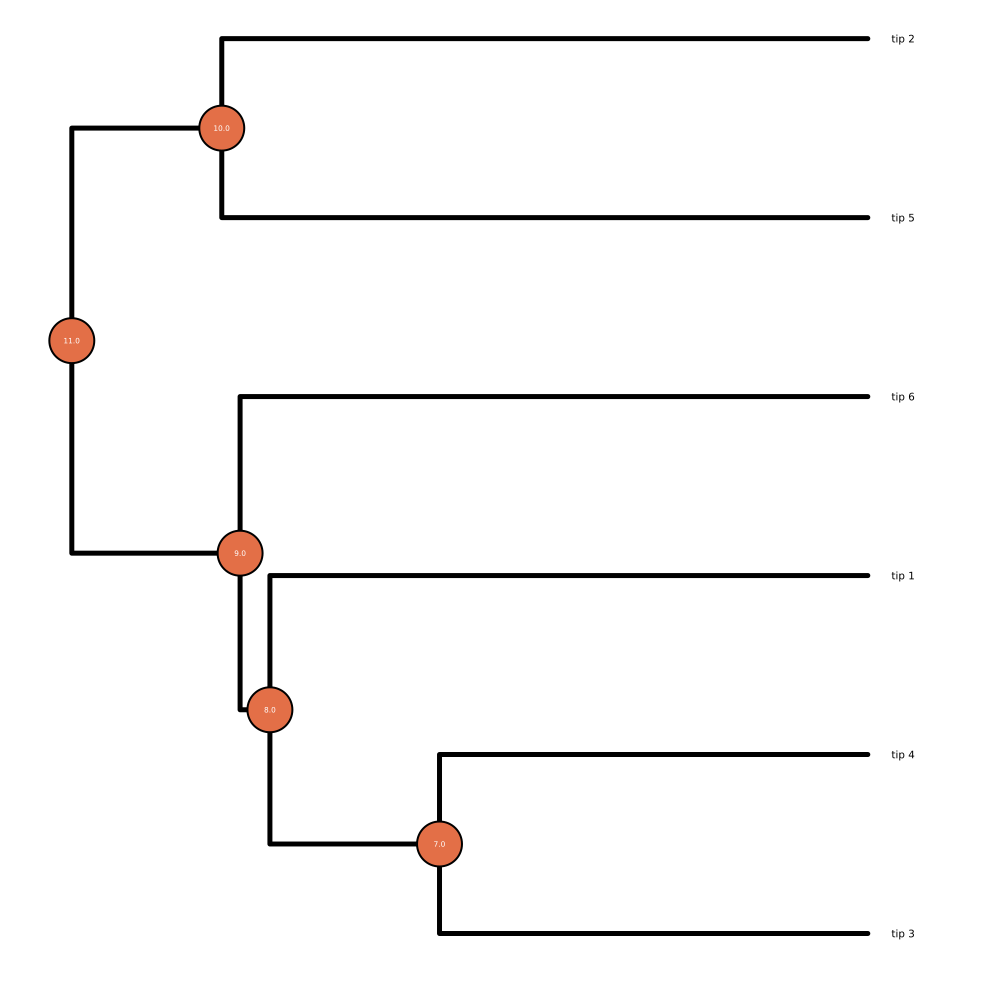

In [4]:
# number of traits
n = 7

# Creating tree
tree_type = Ultrametric(6)
Random.seed!(1)
tree1 = rand(tree_type)
time_tot = 1.0
tspan = (0.0, time_tot)

plot_labelled(tree1)

### Parameter setup

In [5]:
# G matrix
P0 = cor(rand(Wishart(100, Matrix(1I, n, n)  )))

7×7 Matrix{Float64}:
  1.0        -0.179186   -0.147274   …  -0.332079   -0.229666    0.0101498
 -0.179186    1.0         0.0388955     -0.426098   -0.424191    0.0398884
 -0.147274    0.0388955   1.0           -0.282862   -0.11909    -0.300831
  0.0163355   0.297834    0.159516      -0.555539   -0.383896    0.128323
 -0.332079   -0.426098   -0.282862       1.0         0.0466845  -0.269158
 -0.229666   -0.424191   -0.11909    …   0.0466845   1.0        -0.162159
  0.0101498   0.0398884  -0.300831      -0.269158   -0.162159    1.0

In [6]:
# parameters needed to evolve traits
trait_alpha1 = repeat([1.0], n)
trait_mu1 = repeat([0.0], n)
trait_sigma1 = repeat([1.0], n)

# create trait dictionary
trait_parameters = Dict(11 => (alpha = trait_alpha1, mu = trait_mu1, sigma = trait_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 1 entry:
  11 => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0, 0.0,…

In [7]:
# parameters needed to evolve G matrix
mat_alpha1 = 1 .* ones(n,n)
mat_sigma1 = (1 / sqrt(2) * 0.1) .* ones(n,n)
mat_mu1 = copy(P0)

# create matrix dictionary
mat_parameters = Dict(11 => (alpha = mat_alpha1, mu = mat_mu1, sigma = mat_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}}}} with 1 entry:
  11 => (alpha = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; …

In [8]:
# choosing evolution Functions
mat_evol_func = mat_evol()
trait_evol_func = trait_evol()

(::Main.JMMenura.var"#trait_evolving#14"{typeof(trait_drift), typeof(trait_diff), Float64, Float64}) (generic function with 1 method)

## Run simulation

In [9]:
sim1 = menura_para_descend!(mat_parameters, trait_parameters, tree1, trait_evol_func, mat_evol_func, 0.0, trait_mu1, mat_mu1, false)

(RootedTree with 6 tips, 11 nodes and 10 branches.
Leaf names are tip 3, tip 4, tip 1, tip 6, tip 5 and tip 2
, [-0.5414535652575622 -0.27069227647389743 … -0.453106873783895 -0.2747999484855422; 1.3127512483291377 0.051894124495088886 … 0.383288032188017 0.027206611679705138; … ; -0.3996735595247837 -0.8479200100569414 … 0.32008715528410536 0.2979021418982448; 0.6031607176193876 -0.2336479286679423 … -0.5573888687728108 -0.5384177026679611])

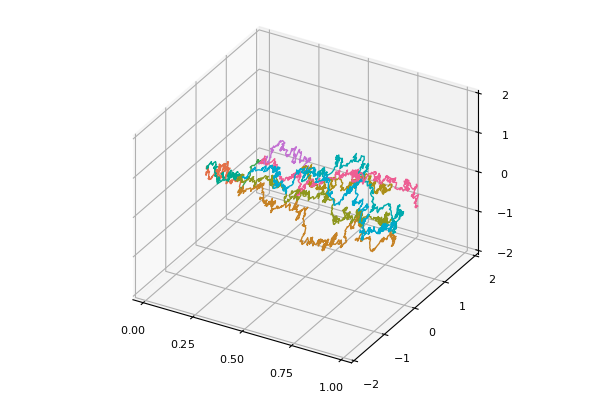

In [10]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false)

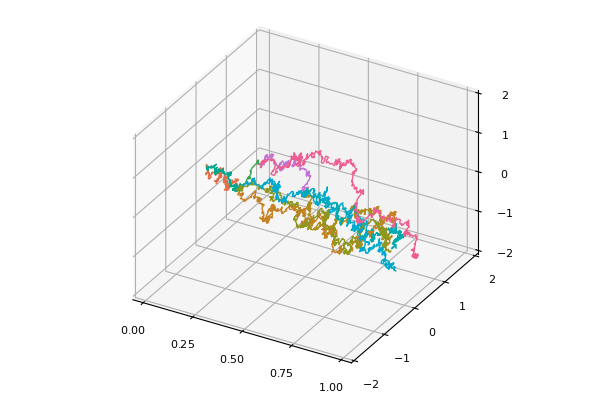

In [11]:
plot_data(tree1, 1, 3,  ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false)

## Parameter change

### Change Trait mean

In [12]:
trait_mu2 = 2 .* ones(n)

# create trait dictionary
trait_parameters2 = Dict(11 => (alpha = trait_alpha1, mu = trait_mu1, sigma = trait_sigma1), 
                            8 => (alpha = trait_alpha1, mu = trait_mu2, sigma = trait_sigma1))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 2 entries:
  11 => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0, 0.0,…
  8  => (alpha = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], mu = [2.0, 2.0, 2.0, 2.0,…

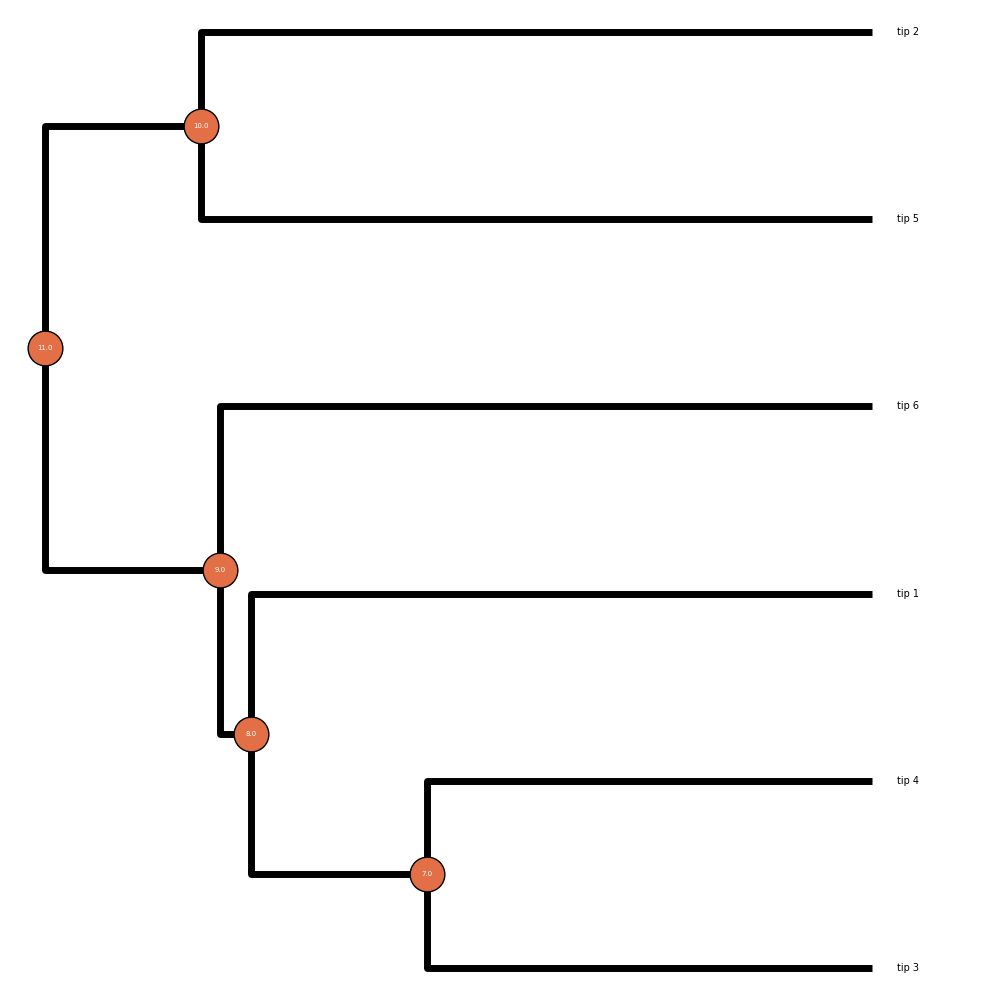

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [13]:
plot_labelled(tree1)

In [14]:
sim2 = menura_para_descend!(mat_parameters, trait_parameters2, tree1, trait_evol_func, mat_evol_func, 0.0, trait_mu1, mat_mu1, false)

(RootedTree with 6 tips, 11 nodes and 10 branches.
Leaf names are tip 3, tip 4, tip 1, tip 6, tip 5 and tip 2
, [1.0460235879754458 1.3475671217574348 … 0.05988308765588076 -0.9400196658547217; 0.0999755905864512 0.8282728791828098 … 0.39861410117476653 0.07437899070179949; … ; 2.273663860164357 1.0684648792613078 … 0.15226610048962963 0.06639565289466483; -0.4124453556597631 1.0213430770830396 … -0.7263195761057492 -0.39671323146850934])

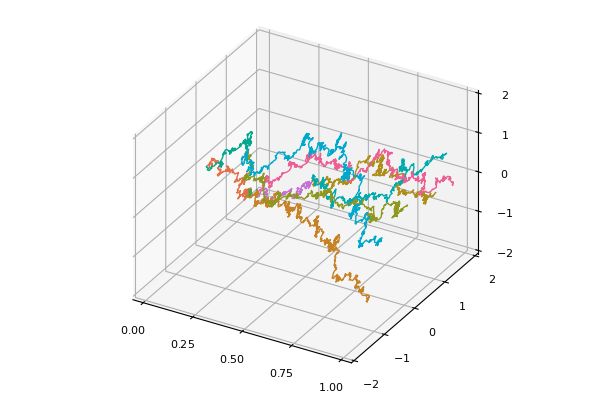

In [15]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false)

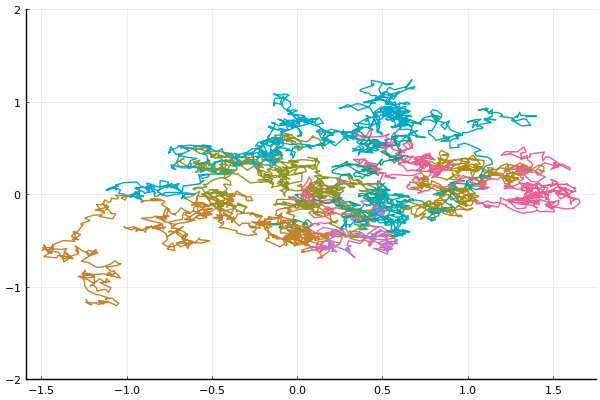

In [16]:
plot_data(tree1, 1, 2, ylim = (-2, 2), zlim = (-2.0, 2.0), legend = false, reuse = false, time = false)

┌ Info: Saved animation to c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura\tests\demo.gif
└ @ Plots C:\Users\coope\.julia\packages\Plots\rz1WP\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\coope\\OneDrive\\Documents\\Uni\\Phylogenetics_coding\\JMMenura\\tests\\demo.gif")
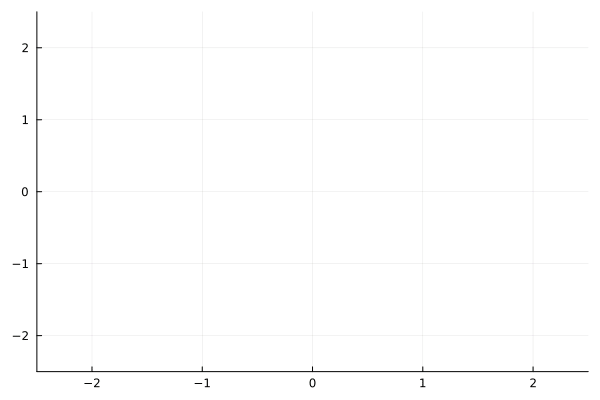

In [17]:
animate_data(tree1, 1, 2, "demo.gif", fps = 10)

┌ Info: Saved animation to c:\Users\coope\OneDrive\Documents\Uni\Phylogenetics_coding\JMMenura\tests\demo_3d.gif
└ @ Plots C:\Users\coope\.julia\packages\Plots\rz1WP\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\coope\\OneDrive\\Documents\\Uni\\Phylogenetics_coding\\JMMenura\\tests\\demo_3d.gif")
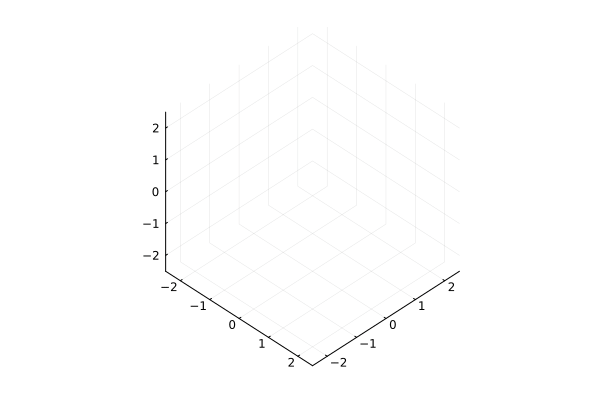

In [18]:
animate_data(tree1, 1, 2, 3, "demo_3d.gif", fps = 10)

## Approximate Bayesian Computation

### Set up smaller simulation

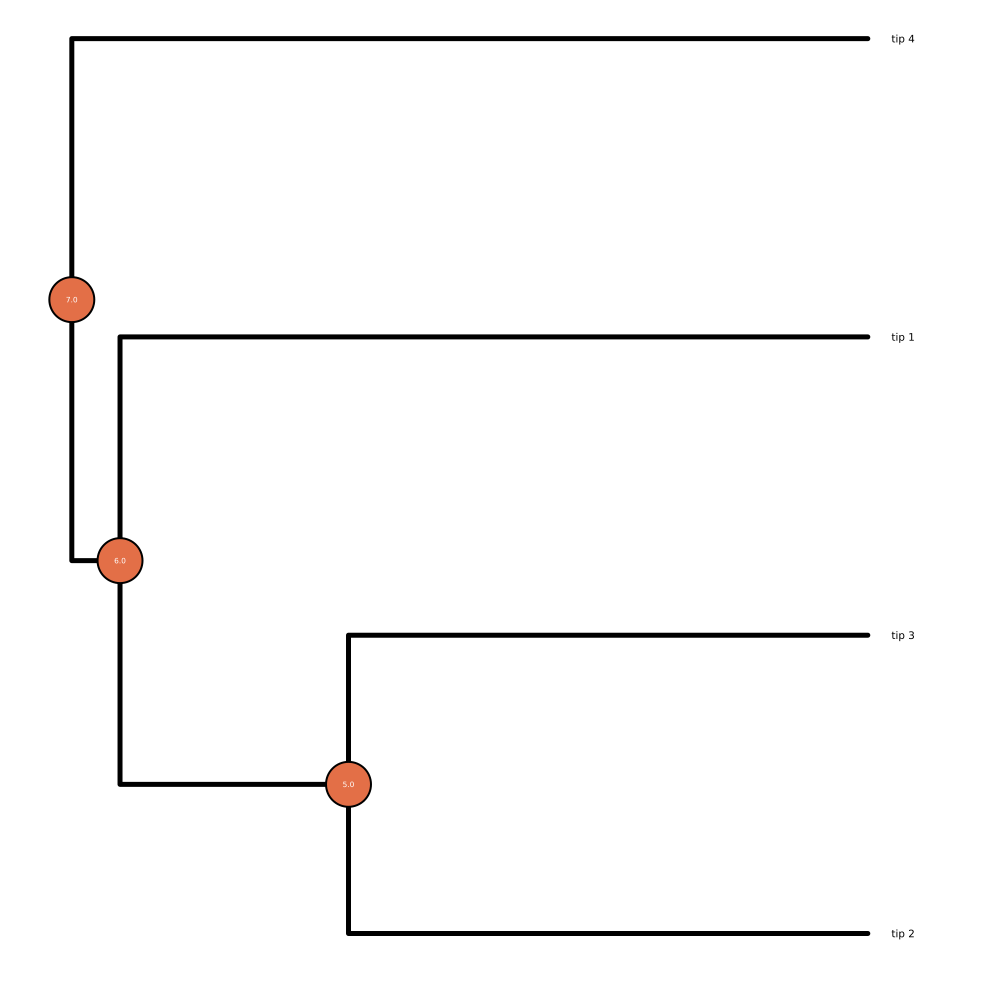

In [36]:
# number of traits
n3 = 3

# Creating tree
tree_type = Ultrametric(4)
Random.seed!(1)
tree3 = rand(tree_type)
time_tot = 1.0
tspan = (0.0, time_tot)

plot_labelled(tree3)

In [37]:
# G matrix
P3 = cor(rand(Wishart(100, Matrix(1I, n3, n3)  )))

3×3 Matrix{Float64}:
  1.0       -0.447957  -0.558309
 -0.447957   1.0       -0.49164
 -0.558309  -0.49164    1.0

In [44]:
# parameters needed to evolve traits
trait_alpha3 = repeat([1.0], n3)
trait_mu3 = repeat([0.0], n3)
trait_sigma3 = repeat([1.0], n3)

# create trait dictionary
trait_parameters3 = Dict(7 => (alpha = trait_alpha3, mu = trait_mu3, sigma = trait_sigma3))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}}} with 1 entry:
  7 => (alpha = [1.0, 1.0, 1.0], mu = [0.0, 0.0, 0.0], sigma = [1.0, 1.0, 1.0])

In [45]:
# parameters needed to evolve G matrix
mat_alpha3 = 1 .* ones(n3,n3)
mat_sigma3 = (1 / sqrt(2) * 0.1) .* ones(n3,n3)
mat_mu3 = copy(P3)

# create matrix dictionary
mat_parameters3 = Dict(7 => (alpha = mat_alpha3, mu = mat_mu3, sigma = mat_sigma3))

Dict{Int64, NamedTuple{(:alpha, :mu, :sigma), Tuple{Matrix{Float64}, Matrix{Float64}, Matrix{Float64}}}} with 1 entry:
  7 => (alpha = [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0], mu = [1.0 -0.447957 -0…

### Priors

In [40]:
α_priors = [Gamma(2,0.25), Gamma(2,0.25)]

2-element Vector{Gamma{Float64}}:
 Gamma{Float64}(α=2.0, θ=0.25)
 Gamma{Float64}(α=2.0, θ=0.25)

### Create reference data

In [46]:
ther_ref_sim = menura_para_descend!(mat_parameters3, trait_parameters3, tree3, trait_evol_func, mat_evol_func, 0.0, trait_mu3, P3, false)

ther_ref_data = get_data(ther_ref_sim[1])

48×1 Matrix{Float64}:
 -1.0592916188421813
  0.8182290968690955
  0.33254205685264265
  0.6944202634383522
 -0.5244291931739904
 -0.23639620282050577
 -0.39740177050045805
 -0.05448611958269594
  0.45667912853844395
  0.282263826385761
  ⋮
  0.9986500465460102
 -0.42009569313053186
 -0.5797834408488494
 -0.42009569313053186
  0.9221840037434456
 -0.4481885902114741
 -0.5797834408488494
 -0.4481885902114741
  0.9791256404919749

### Running ABC

In [63]:
parameters = JMMABCAlphaEqualConstant(Gamma(2,0.25), trait_mu3, trait_sigma3, Gamma(2,0.25), mat_mu3, mat_sigma3, n3)
mat_start = cor(rand(Wishart(100, Matrix(1I, n3, n3)  )))

3×3 Matrix{Float64}:
  1.0       -0.703239  -0.27969
 -0.703239   1.0       -0.48589
 -0.27969   -0.48589    1.0

In [66]:
out = menura_bayesian(ther_ref_data, tree3, parameters, trait_mu3, P3, 120.0, 40)

┌ Info: GpABC rejection simulation. ϵ = 120.0.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:47


GpABC.SimulatedABCRejectionOutput(2, 40, 945, 120.0, [0.43739413960805423 0.5271088762870758; 0.2973387351953523 0.1868420361649974; … ; 0.16380826239766402 0.5151471161749254; 0.11101284661304951 0.5279429823616729], [113.0014074033171, 113.78331591111775, 119.15729148079397, 115.69620279470979, 119.0812998644567, 119.46281200094523, 119.73938949491402, 119.2585804077033, 116.77826138975102, 118.3016442691824  …  119.37998152798689, 118.74064513303553, 118.07960799873663, 115.00312936285978, 119.83402541987223, 118.66411940448602, 114.87503104445233, 118.05199086131302, 117.03800262656432, 114.43016010909636], [0.030608100803241434, 0.050372600966444685, 0.04313855387964332, 0.012025682175912069, 0.004254122583265993, 0.00011157764005936934, 0.03576928248947456, 0.050247616901602316, 0.02789079103618735, 0.03350394566690855  …  0.019231690779956734, 0.052232107012495595, 0.021777702410889617, 0.015828020449349847, 0.032750722449336585, 0.0012556527228558276, 0.03226746075173565, 0.013

In [57]:
out2 = menura_bayesian(ther_ref_data, tree3, parameters, ones(n3),  Matrix(1I, n3, n3), 120.0, 1000)

┌ Info: GpABC rejection simulation. ϵ = 120.0.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:47


┌ Info: GpABC rejection simulation. Accepted 50/1000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 101/2000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 148/3000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 184/4000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 230/5000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 274/6000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 321/7000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 360/8000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 408/9000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 439/10000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 488/11000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 535/12000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 575/13000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 618/14000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 660/15000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 700/16000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 747/17000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87
┌ Info: GpABC rejection simulation. Accepted 788/18000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 844/19000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 888/20000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 934/21000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


┌ Info: GpABC rejection simulation. Accepted 969/22000 particles.
└ @ GpABC C:\Users\coope\.julia\packages\GpABC\o0EN1\src\abc\rejection.jl:87


GpABC.SimulatedABCRejectionOutput(2, 1000, 22624, 120.0, [0.442382407731248 0.12335554034891605; 0.5501639049016898 0.3799473234296745; … ; 0.02640017942998801 0.32806134188371633; 0.2487789948790982 0.4153704464641544], [119.2213100871267, 118.1143707862018, 119.60197746140982, 119.37136396903418, 119.72541380275888, 119.62972879799807, 118.71529063151304, 119.8509704469666, 117.08467053767868, 118.27708920098596  …  118.73816301210071, 119.19390883795215, 116.23269333863706, 119.88408257264638, 118.47173641613615, 119.6400183552356, 119.54139347619792, 116.4410173906311, 119.10690290113926, 111.94861285062957], [0.0015293914261338701, 0.0013639435819232015, 0.002160722118713707, 0.0016097067114607723, 0.0013252689219349903, 0.00048755723160209103, 0.000515761171292197, 0.0018671308474958407, 0.0013306045732143783, 0.0002794028960110704  …  0.0015115132784371418, 0.0008850851783084478, 0.0017966483172710517, 8.594078517316933e-5, 0.0022782705807315624, 0.0003085325538465562, 0.0015810

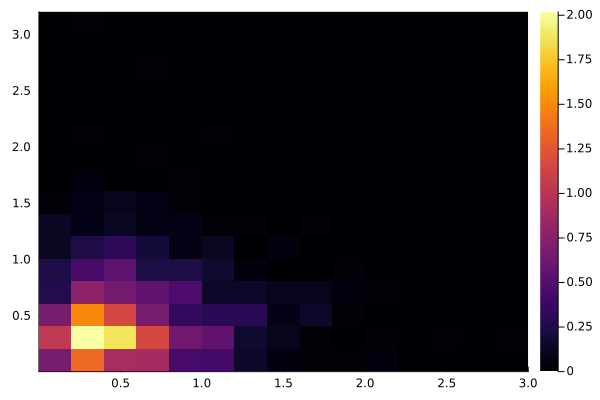

In [58]:
x = out.population[:,1]
y = out.population[:,2]
append!(x, out2.population[:,1])
append!(y, out2.population[:,2])
histogram2d(x, y, normalize = :pdf, show_empty_bins = true)

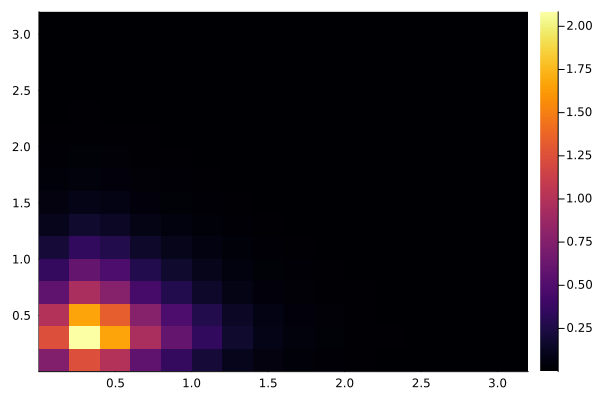

In [59]:
points = [[i,j] for i in 0.05:0.01:3 for j in 0.05:0.01:3]
ws = [pdf(Gamma(2,0.25), point[1])*pdf(Gamma(2,0.25), point[2]) for point in points]
xs = [point[1] for point in points]
ys = [point[2] for point in points]
histogram2d(xs, ys, weights = ws, normalize = :pdf)